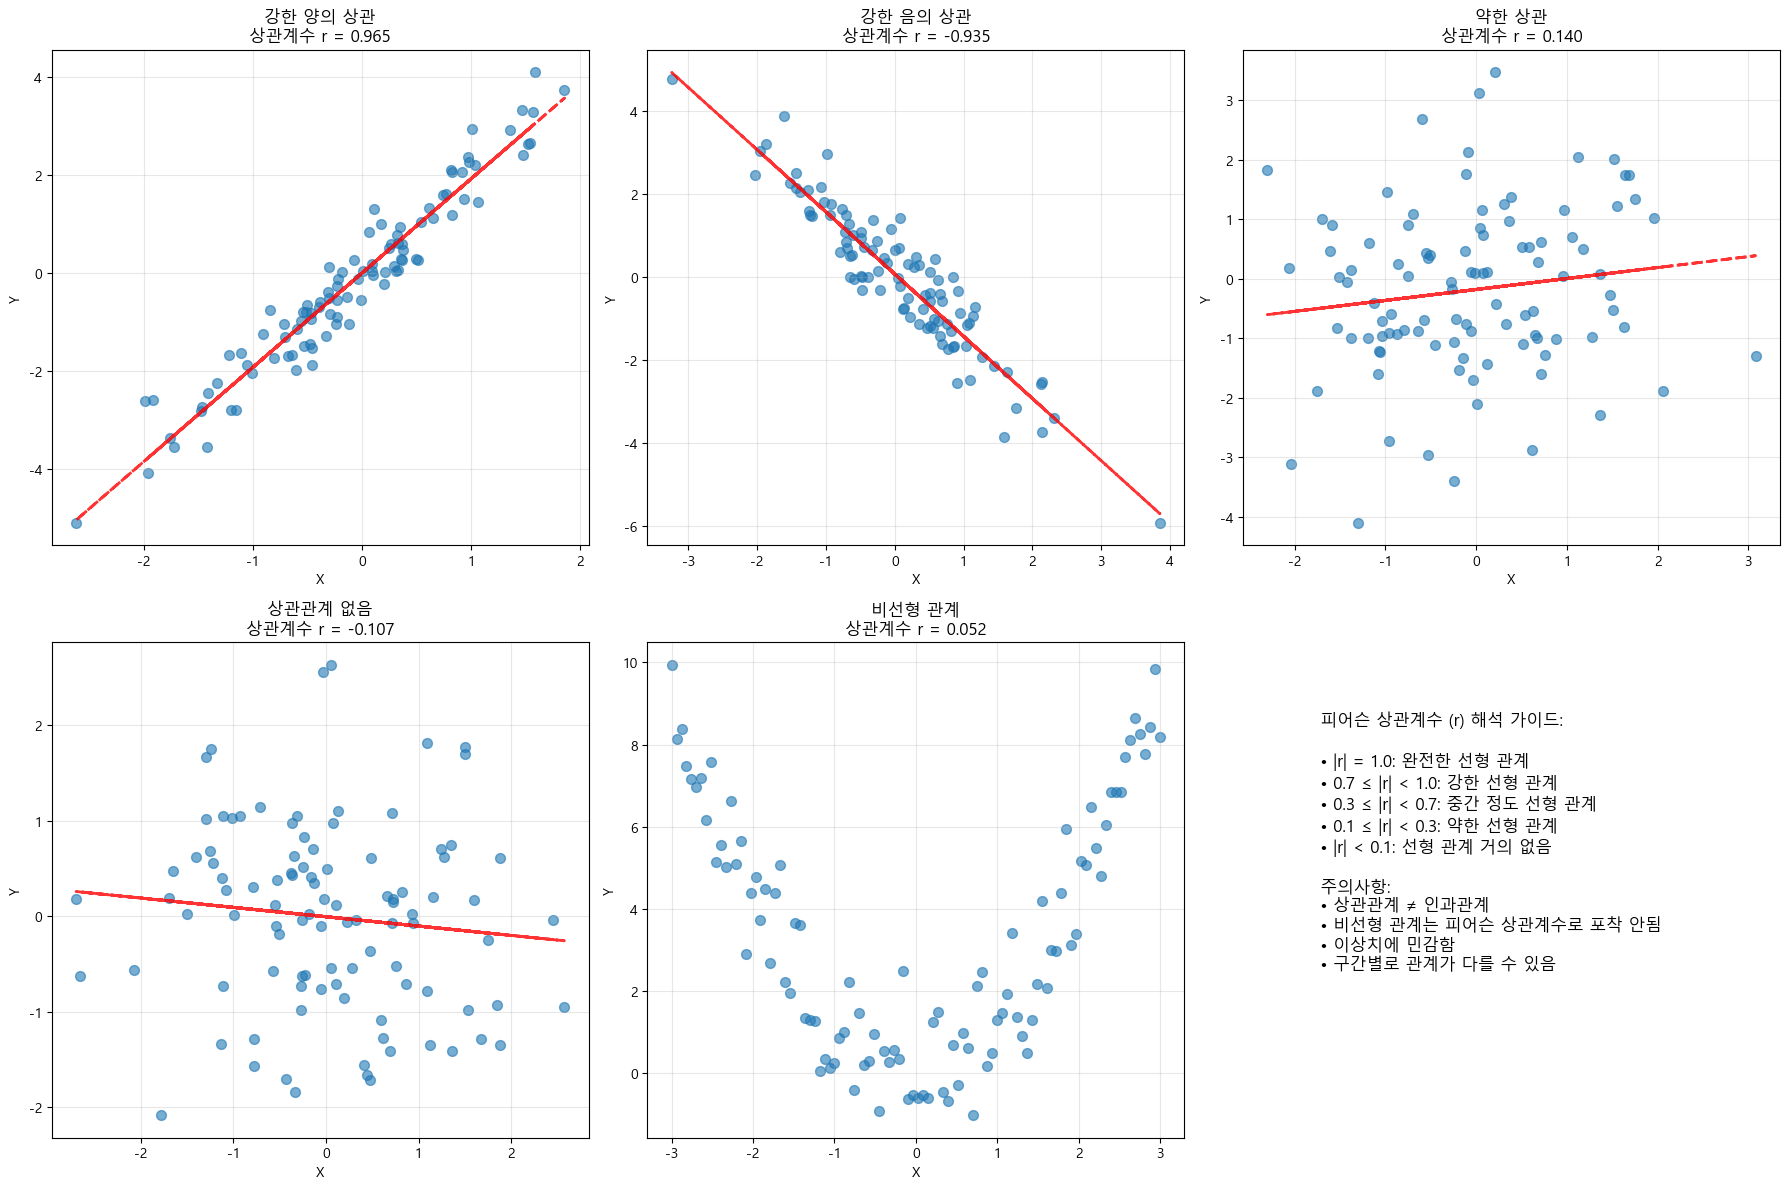

ValueError: probabilities do not sum to 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 다양한 상관관계 시각화
def demonstrate_correlations():
    np.random.seed(42)
    n = 100
    
    # 1. 강한 양의 상관관계
    x1 = np.random.normal(0, 1, n)
    y1 = 2 * x1 + np.random.normal(0, 0.5, n)
    
    # 2. 강한 음의 상관관계
    x2 = np.random.normal(0, 1, n)
    y2 = -1.5 * x2 + np.random.normal(0, 0.7, n)
    
    # 3. 약한 상관관계
    x3 = np.random.normal(0, 1, n)
    y3 = 0.3 * x3 + np.random.normal(0, 1.5, n)
    
    # 4. 상관관계 없음
    x4 = np.random.normal(0, 1, n)
    y4 = np.random.normal(0, 1, n)
    
    # 5. 비선형 관계 (상관계수는 낮지만 강한 관계)
    x5 = np.linspace(-3, 3, n)
    y5 = x5**2 + np.random.normal(0, 1, n)
    
    # 상관계수 계산
    correlations = [
        stats.pearsonr(x1, y1)[0],
        stats.pearsonr(x2, y2)[0],
        stats.pearsonr(x3, y3)[0],
        stats.pearsonr(x4, y4)[0],
        stats.pearsonr(x5, y5)[0]
    ]
    
    # 시각화
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()
    
    datasets = [(x1, y1), (x2, y2), (x3, y3), (x4, y4), (x5, y5)]
    titles = ['강한 양의 상관', '강한 음의 상관', '약한 상관', '상관관계 없음', '비선형 관계']
    
    for i, ((x, y), title, corr) in enumerate(zip(datasets, titles, correlations)):
        if i < 5:
            axes[i].scatter(x, y, alpha=0.6, s=50)
            axes[i].set_title(f'{title}\n상관계수 r = {corr:.3f}')
            axes[i].set_xlabel('X')
            axes[i].set_ylabel('Y')
            axes[i].grid(True, alpha=0.3)
            
            # 회귀직선 추가 (비선형 관계 제외)
            if i < 4:
                z = np.polyfit(x, y, 1)
                p = np.poly1d(z)
                axes[i].plot(x, p(x), "r--", alpha=0.8, linewidth=2)
    
    # 여섯 번째 subplot: 상관계수 해석 가이드
    axes[5].axis('off')
    interpretation_text = """
    피어슨 상관계수 (r) 해석 가이드:
    
    • |r| = 1.0: 완전한 선형 관계
    • 0.7 ≤ |r| < 1.0: 강한 선형 관계
    • 0.3 ≤ |r| < 0.7: 중간 정도 선형 관계
    • 0.1 ≤ |r| < 0.3: 약한 선형 관계
    • |r| < 0.1: 선형 관계 거의 없음
    
    주의사항:
    • 상관관계 ≠ 인과관계
    • 비선형 관계는 피어슨 상관계수로 포착 안됨
    • 이상치에 민감함
    • 구간별로 관계가 다를 수 있음
    """
    axes[5].text(0.1, 0.9, interpretation_text, transform=axes[5].transAxes, 
                fontsize=12, verticalalignment='top', fontfamily='Malgun Gothic')
    
    plt.tight_layout()
    plt.show()
    
    return correlations

correlations = demonstrate_correlations()

#### 실제 데이터를 활용한 상관관계 분석

# 타이타닉 데이터 시뮬레이션으로 상관관계 분석
np.random.seed(42)

# 타이타닉 승객 데이터 시뮬레이션
n_passengers = 891

titanic_data = pd.DataFrame({
    'age': np.random.normal(29.7, 14.5, n_passengers),
    'fare': np.random.lognormal(2.5, 1.2, n_passengers),
    'pclass': np.random.choice([1, 2, 3], n_passengers, p=[0.24, 0.21, 0.55]),
    'sibsp': np.random.choice([0, 1, 2, 3, 4, 5], n_passengers, p=[0.68, 0.23, 0.07, 0.015, 0.013, 0.002]),
    'parch': np.random.choice([0, 1, 2, 3, 4, 5, 6], n_passengers, p=[0.76, 0.13, 0.08, 0.015, 0.004, 0.002, 0.001])
})

# 현실적인 관계 설정
titanic_data['fare'] = titanic_data['fare'] * (4 - titanic_data['pclass'])  # 등급이 높을수록 비싼 요금
titanic_data['age'] = np.clip(titanic_data['age'], 0, 80)  # 나이 범위 제한

print("=== 타이타닉 데이터 상관관계 분석 ===")
print("\n기술통계:")
print(titanic_data.describe().round(2))

# 상관계수 행렬 계산
correlation_matrix = titanic_data.corr()
print(f"\n상관계수 행렬:")
print(correlation_matrix.round(3))

# 히트맵으로 시각화
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.3f', cbar_kws={"shrink": .8})
plt.title('타이타닉 데이터 변수간 상관관계')
plt.tight_layout()
plt.show()

# 주요 상관관계 분석
significant_correlations = []
for i, col1 in enumerate(correlation_matrix.columns):
    for j, col2 in enumerate(correlation_matrix.columns):
        if i < j:  # 상삼각행렬만 확인
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.1:  # 절댓값 0.1 이상만
                significant_correlations.append({
                    'Variable 1': col1,
                    'Variable 2': col2,
                    'Correlation': corr_value,
                    'Strength': '강함' if abs(corr_value) >= 0.7 else '중간' if abs(corr_value) >= 0.3 else '약함'
                })

significant_df = pd.DataFrame(significant_correlations)
significant_df = significant_df.sort_values('Correlation', key=abs, ascending=False)

print(f"\n주요 상관관계 (|r| > 0.1):")
print(significant_df.to_string(index=False))

### 3.3.2 인과관계 추론의 어려움

#### 상관관계 ≠ 인과관계의 고전적 사례들

print("\n=== 상관관계와 인과관계 혼동 사례 ===")

classic_examples = [
    {
        "사례": "아이스크림 판매량과 범죄율",
        "관찰된 상관관계": "양의 상관관계 (아이스크림 판매 증가 → 범죄율 증가)",
        "실제 원인": "기온 (더운 날씨에 아이스크림 판매↑, 사람들이 밖에 나와 범죄 기회↑)",
        "교훈": "숨겨진 제3의 변수(교란변수) 존재"
    },
    {
        "사례": "TV 시청시간과 비만율",
        "관찰된 상관관계": "양의 상관관계 (TV 시청↑ → 비만율↑)",
        "실제 원인": "복합적 (운동 부족, 간식 섭취, 생활 패턴 등)",
        "교훈": "다중 원인과 상호작용 효과"
    },
    {
        "사례": "교육 수준과 소득",
        "관찰된 상관관계": "양의 상관관계 (교육 수준↑ → 소득↑)",
        "실제 원인": "부분적 인과관계 + 가정환경, 개인 능력 등",
        "교훈": "인과관계가 있어도 다른 요인들의 영향 고려 필요"
    }
]

for i, example in enumerate(classic_examples, 1):
    print(f"{i}. {example['사례']}")
    print(f"   관찰: {example['관찰된 상관관계']}")
    print(f"   실제: {example['실제 원인']}")
    print(f"   교훈: {example['교훈']}")
    print()

#### 허위 상관(Spurious Correlation) 시뮬레이션

def demonstrate_spurious_correlation():
    """허위 상관 시뮬레이션"""
    np.random.seed(42)
    n = 365  # 1년 데이터
    
    # 공통 원인: 계절 (sine 파형으로 표현)
    days = np.arange(n)
    seasonal_effect = np.sin(2 * np.pi * days / 365)
    
    # 두 개의 독립적인 변수가 계절의 영향을 받음
    ice_cream_sales = 50 + 30 * seasonal_effect + np.random.normal(0, 5, n)
    drowning_incidents = 5 + 3 * seasonal_effect + np.random.normal(0, 1, n)
    
    # 허위 상관계수 계산
    spurious_corr = stats.pearsonr(ice_cream_sales, drowning_incidents)[0]
    
    # 시각화
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. 시계열 그래프
    axes[0, 0].plot(days, ice_cream_sales, label='아이스크림 판매량', alpha=0.7)
    axes[0, 0].plot(days, drowning_incidents * 10, label='익사 사고 × 10', alpha=0.7)  # 스케일 조정
    axes[0, 0].set_xlabel('일자 (1년)')
    axes[0, 0].set_ylabel('값')
    axes[0, 0].set_title('시간에 따른 변화 패턴')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. 산점도
    axes[0, 1].scatter(ice_cream_sales, drowning_incidents, alpha=0.6)
    axes[0, 1].set_xlabel('아이스크림 판매량')
    axes[0, 1].set_ylabel('익사 사고 건수')
    axes[0, 1].set_title(f'허위 상관관계\nr = {spurious_corr:.3f}')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 회귀직선 추가
    z = np.polyfit(ice_cream_sales, drowning_incidents, 1)
    p = np.poly1d(z)
    axes[0, 1].plot(ice_cream_sales, p(ice_cream_sales), "r--", alpha=0.8, linewidth=2)
    
    # 3. 계절 효과와 아이스크림 판매량
    axes[1, 0].scatter(seasonal_effect, ice_cream_sales, alpha=0.6, color='orange')
    axes[1, 0].set_xlabel('계절 효과')
    axes[1, 0].set_ylabel('아이스크림 판매량')
    axes[1, 0].set_title('진짜 원인: 계절 → 아이스크림')
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. 계절 효과와 익사 사고
    axes[1, 1].scatter(seasonal_effect, drowning_incidents, alpha=0.6, color='red')
    axes[1, 1].set_xlabel('계절 효과')
    axes[1, 1].set_ylabel('익사 사고 건수')
    axes[1, 1].set_title('진짜 원인: 계절 → 익사 사고')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"허위 상관계수: {spurious_corr:.3f}")
    print("해석: 아이스크림 판매량과 익사 사고는 직접적 인과관계가 없음")
    print("실제 원인: 둘 다 날씨(계절)의 영향을 받는 공통 원인 존재")
    
    return spurious_corr

spurious_corr = demonstrate_spurious_correlation()

### 3.3.3 실험 설계와 인과 추론

#### 인과관계 확립을 위한 조건 (Bradford Hill 기준)

print("\n=== 인과관계 확립을 위한 주요 기준 ===")

causality_criteria = [
    {
        "기준": "시간적 선후관계",
        "설명": "원인이 결과보다 시간적으로 먼저 발생해야 함",
        "예시": "흡연이 폐암보다 먼저 시작되어야 함"
    },
    {
        "기준": "연관성의 강도",
        "설명": "원인과 결과 간의 통계적 연관성이 강해야 함",
        "예시": "흡연량이 많을수록 폐암 발생률이 크게 증가"
    },
    {
        "기준": "용량-반응 관계",
        "설명": "원인의 강도에 따라 결과도 비례적으로 변화",
        "예시": "흡연량 증가 → 폐암 위험 증가"
    },
    {
        "기준": "일관성",
        "설명": "다양한 연구에서 동일한 결과가 반복적으로 관찰",
        "예시": "여러 국가, 여러 연구에서 흡연-폐암 관계 확인"
    },
    {
        "기준": "생물학적 합리성",
        "설명": "알려진 과학적 메커니즘으로 설명 가능",
        "예시": "니코틴과 타르의 발암 메커니즘"
    }
]

for i, criterion in enumerate(causality_criteria, 1):
    print(f"{i}. {criterion['기준']}")
    print(f"   설명: {criterion['설명']}")
    print(f"   예시: {criterion['예시']}")
    print()

# 간단한 인과 추론 방법들과 요약만 포함
print("\n=== 관찰 연구에서의 인과 추론 방법 ===")
print("1. 자연 실험: 자연적으로 발생한 무작위 배정과 유사한 상황 활용")
print("2. 도구 변수: 결과에는 영향을 주지 않고 처치에만 영향을 주는 변수 활용")
print("3. 회귀 불연속: 임계점 주변에서의 불연속적 변화 활용")
print("4. 성향 점수 매칭: 관찰된 특성을 바탕으로 유사한 개체들을 매칭")

In [2]:

print("\n=== 상관관계와 인과관계 혼동 사례 ===")

classic_examples = [
    {
        "사례": "아이스크림 판매량과 범죄율",
        "관찰된 상관관계": "양의 상관관계 (아이스크림 판매 증가 → 범죄율 증가)",
        "실제 원인": "기온 (더운 날씨에 아이스크림 판매↑, 사람들이 밖에 나와 범죄 기회↑)",
        "교훈": "숨겨진 제3의 변수(교란변수) 존재"
    },
    {
        "사례": "TV 시청시간과 비만율",
        "관찰된 상관관계": "양의 상관관계 (TV 시청↑ → 비만율↑)",
        "실제 원인": "복합적 (운동 부족, 간식 섭취, 생활 패턴 등)",
        "교훈": "다중 원인과 상호작용 효과"
    },
    {
        "사례": "교육 수준과 소득",
        "관찰된 상관관계": "양의 상관관계 (교육 수준↑ → 소득↑)",
        "실제 원인": "부분적 인과관계 + 가정환경, 개인 능력 등",
        "교훈": "인과관계가 있어도 다른 요인들의 영향 고려 필요"
    }
]

for i, example in enumerate(classic_examples, 1):
    print(f"{i}. {example['사례']}")
    print(f"   관찰: {example['관찰된 상관관계']}")
    print(f"   실제: {example['실제 원인']}")
    print(f"   교훈: {example['교훈']}")
    print()


=== 상관관계와 인과관계 혼동 사례 ===
1. 아이스크림 판매량과 범죄율
   관찰: 양의 상관관계 (아이스크림 판매 증가 → 범죄율 증가)
   실제: 기온 (더운 날씨에 아이스크림 판매↑, 사람들이 밖에 나와 범죄 기회↑)
   교훈: 숨겨진 제3의 변수(교란변수) 존재

2. TV 시청시간과 비만율
   관찰: 양의 상관관계 (TV 시청↑ → 비만율↑)
   실제: 복합적 (운동 부족, 간식 섭취, 생활 패턴 등)
   교훈: 다중 원인과 상호작용 효과

3. 교육 수준과 소득
   관찰: 양의 상관관계 (교육 수준↑ → 소득↑)
   실제: 부분적 인과관계 + 가정환경, 개인 능력 등
   교훈: 인과관계가 있어도 다른 요인들의 영향 고려 필요



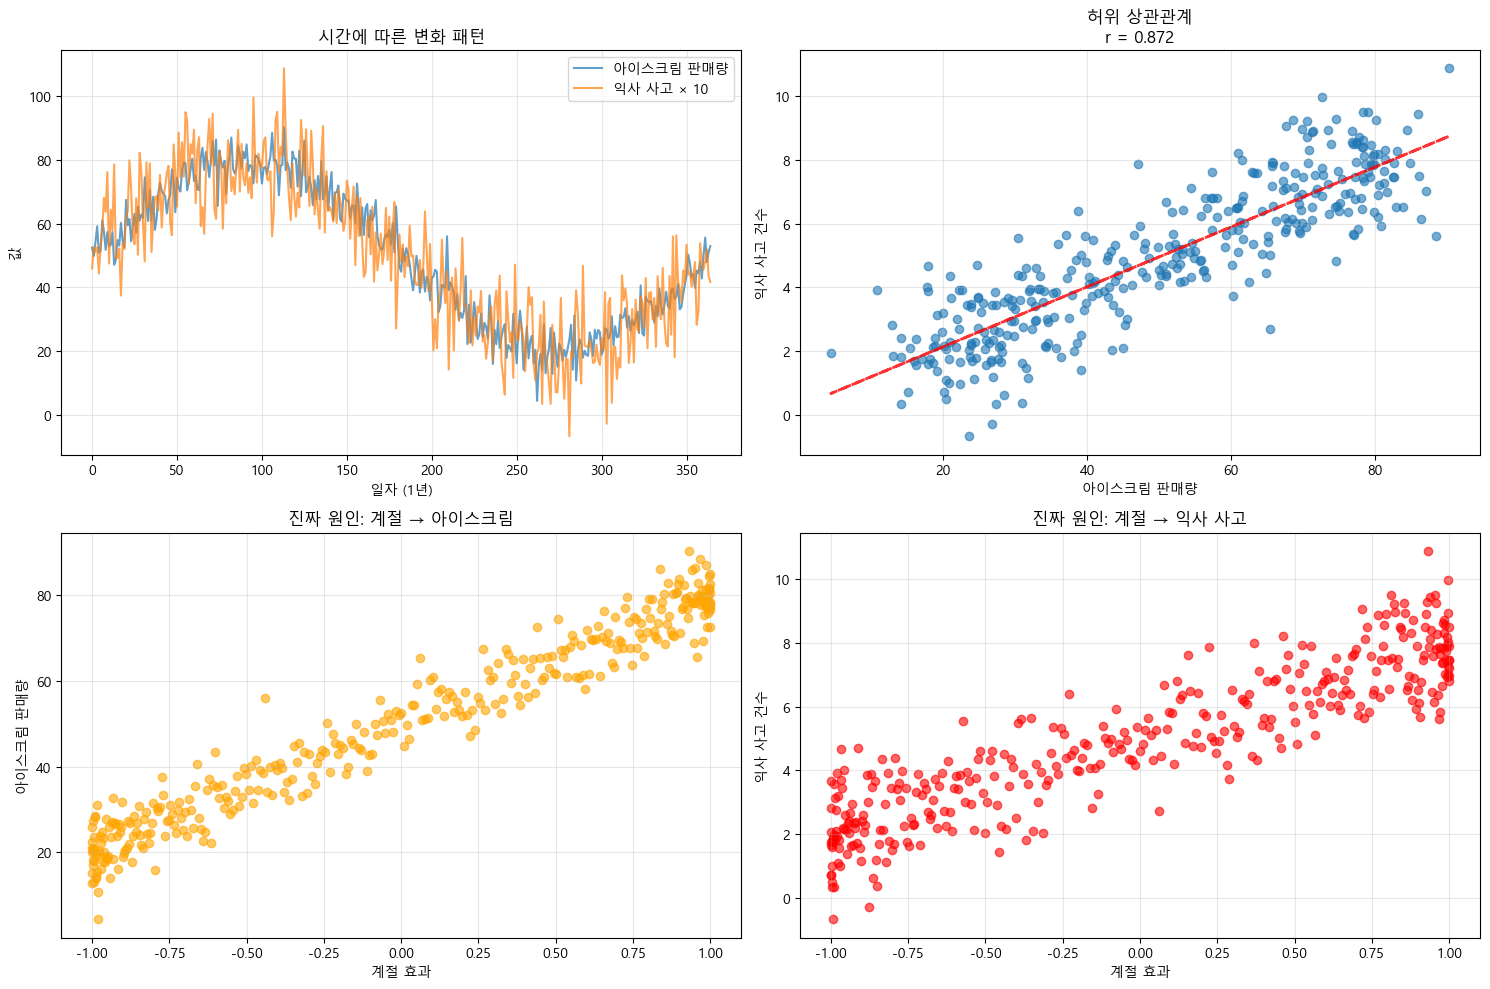

허위 상관계수: 0.872
해석: 아이스크림 판매량과 익사 사고는 직접적 인과관계가 없음
실제 원인: 둘 다 날씨(계절)의 영향을 받는 공통 원인 존재


In [3]:
def demonstrate_spurious_correlation():
    """허위 상관 시뮬레이션"""
    np.random.seed(42)
    n = 365  # 1년 데이터
    
    # 공통 원인: 계절 (sine 파형으로 표현)
    days = np.arange(n)
    seasonal_effect = np.sin(2 * np.pi * days / 365)
    
    # 두 개의 독립적인 변수가 계절의 영향을 받음
    ice_cream_sales = 50 + 30 * seasonal_effect + np.random.normal(0, 5, n)
    drowning_incidents = 5 + 3 * seasonal_effect + np.random.normal(0, 1, n)
    
    # 허위 상관계수 계산
    spurious_corr = stats.pearsonr(ice_cream_sales, drowning_incidents)[0]
    
    # 시각화
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. 시계열 그래프
    axes[0, 0].plot(days, ice_cream_sales, label='아이스크림 판매량', alpha=0.7)
    axes[0, 0].plot(days, drowning_incidents * 10, label='익사 사고 × 10', alpha=0.7)  # 스케일 조정
    axes[0, 0].set_xlabel('일자 (1년)')
    axes[0, 0].set_ylabel('값')
    axes[0, 0].set_title('시간에 따른 변화 패턴')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. 산점도
    axes[0, 1].scatter(ice_cream_sales, drowning_incidents, alpha=0.6)
    axes[0, 1].set_xlabel('아이스크림 판매량')
    axes[0, 1].set_ylabel('익사 사고 건수')
    axes[0, 1].set_title(f'허위 상관관계\nr = {spurious_corr:.3f}')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 회귀직선 추가
    z = np.polyfit(ice_cream_sales, drowning_incidents, 1)
    p = np.poly1d(z)
    axes[0, 1].plot(ice_cream_sales, p(ice_cream_sales), "r--", alpha=0.8, linewidth=2)
    
    # 3. 계절 효과와 아이스크림 판매량
    axes[1, 0].scatter(seasonal_effect, ice_cream_sales, alpha=0.6, color='orange')
    axes[1, 0].set_xlabel('계절 효과')
    axes[1, 0].set_ylabel('아이스크림 판매량')
    axes[1, 0].set_title('진짜 원인: 계절 → 아이스크림')
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. 계절 효과와 익사 사고
    axes[1, 1].scatter(seasonal_effect, drowning_incidents, alpha=0.6, color='red')
    axes[1, 1].set_xlabel('계절 효과')
    axes[1, 1].set_ylabel('익사 사고 건수')
    axes[1, 1].set_title('진짜 원인: 계절 → 익사 사고')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"허위 상관계수: {spurious_corr:.3f}")
    print("해석: 아이스크림 판매량과 익사 사고는 직접적 인과관계가 없음")
    print("실제 원인: 둘 다 날씨(계절)의 영향을 받는 공통 원인 존재")
    
    return spurious_corr

spurious_corr = demonstrate_spurious_correlation()

In [4]:
#### 인과관계 확립을 위한 조건 (Bradford Hill 기준)

print("\n=== 인과관계 확립을 위한 주요 기준 ===")

causality_criteria = [
    {
        "기준": "시간적 선후관계",
        "설명": "원인이 결과보다 시간적으로 먼저 발생해야 함",
        "예시": "흡연이 폐암보다 먼저 시작되어야 함"
    },
    {
        "기준": "연관성의 강도",
        "설명": "원인과 결과 간의 통계적 연관성이 강해야 함",
        "예시": "흡연량이 많을수록 폐암 발생률이 크게 증가"
    },
    {
        "기준": "용량-반응 관계",
        "설명": "원인의 강도에 따라 결과도 비례적으로 변화",
        "예시": "흡연량 증가 → 폐암 위험 증가"
    },
    {
        "기준": "일관성",
        "설명": "다양한 연구에서 동일한 결과가 반복적으로 관찰",
        "예시": "여러 국가, 여러 연구에서 흡연-폐암 관계 확인"
    },
    {
        "기준": "생물학적 합리성",
        "설명": "알려진 과학적 메커니즘으로 설명 가능",
        "예시": "니코틴과 타르의 발암 메커니즘"
    }
]

for i, criterion in enumerate(causality_criteria, 1):
    print(f"{i}. {criterion['기준']}")
    print(f"   설명: {criterion['설명']}")
    print(f"   예시: {criterion['예시']}")
    print()

# 간단한 인과 추론 방법들과 요약만 포함
print("\n=== 관찰 연구에서의 인과 추론 방법 ===")
print("1. 자연 실험: 자연적으로 발생한 무작위 배정과 유사한 상황 활용")
print("2. 도구 변수: 결과에는 영향을 주지 않고 처치에만 영향을 주는 변수 활용")
print("3. 회귀 불연속: 임계점 주변에서의 불연속적 변화 활용")
print("4. 성향 점수 매칭: 관찰된 특성을 바탕으로 유사한 개체들을 매칭")


=== 인과관계 확립을 위한 주요 기준 ===
1. 시간적 선후관계
   설명: 원인이 결과보다 시간적으로 먼저 발생해야 함
   예시: 흡연이 폐암보다 먼저 시작되어야 함

2. 연관성의 강도
   설명: 원인과 결과 간의 통계적 연관성이 강해야 함
   예시: 흡연량이 많을수록 폐암 발생률이 크게 증가

3. 용량-반응 관계
   설명: 원인의 강도에 따라 결과도 비례적으로 변화
   예시: 흡연량 증가 → 폐암 위험 증가

4. 일관성
   설명: 다양한 연구에서 동일한 결과가 반복적으로 관찰
   예시: 여러 국가, 여러 연구에서 흡연-폐암 관계 확인

5. 생물학적 합리성
   설명: 알려진 과학적 메커니즘으로 설명 가능
   예시: 니코틴과 타르의 발암 메커니즘


=== 관찰 연구에서의 인과 추론 방법 ===
1. 자연 실험: 자연적으로 발생한 무작위 배정과 유사한 상황 활용
2. 도구 변수: 결과에는 영향을 주지 않고 처치에만 영향을 주는 변수 활용
3. 회귀 불연속: 임계점 주변에서의 불연속적 변화 활용
4. 성향 점수 매칭: 관찰된 특성을 바탕으로 유사한 개체들을 매칭


=== 사례 1: AI의 상관관계-인과관계 혼동 ===
상황: 온라인 쇼핑몰의 방문 시간과 구매 금액 분석

【AI의 잘못된 분석】
상관계수: 0.532
해석: '방문 시간이 길수록 구매 금액이 증가한다. 따라서 고객의 방문 시간을 늘리면 매출이 증가할 것이다.'
권장사항: '웹사이트 로딩 속도를 의도적으로 늦춰서 방문 시간을 늘리자.'

【올바른 분석】
문제점 1: 상관관계를 인과관계로 해석
문제점 2: 숨겨진 교란변수(관심도) 무시
문제점 3: 역 인과관계 가능성 무시 (구매 의도가 높아서 오래 머물 수 있음)

올바른 해석: 상품에 대한 관심도가 높은 고객이 오래 머물면서 더 많이 구매하는 것
올바른 권장사항: 상품의 매력도를 높이는 방법 찾기 (콘텐츠 품질, 가격 경쟁력 등)


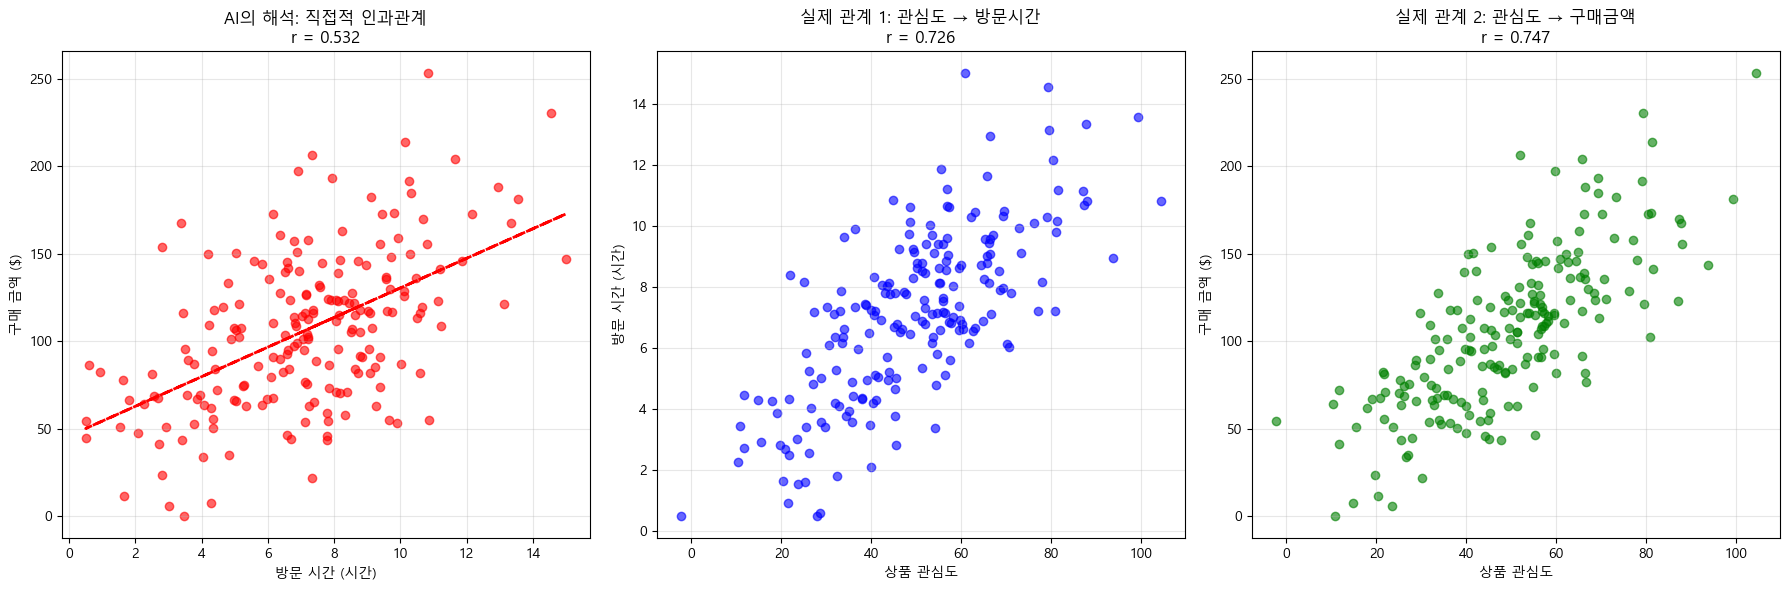

In [5]:

def simulate_ai_correlation_error():
    """AI가 상관관계를 인과관계로 오해하는 사례"""
    np.random.seed(42)
    n = 200
    
    print("=== 사례 1: AI의 상관관계-인과관계 혼동 ===")
    print("상황: 온라인 쇼핑몰의 방문 시간과 구매 금액 분석")
    print()
    
    # 실제 상황: 관심도(숨겨진 변수)가 둘 다에 영향
    interest_level = np.random.normal(50, 20, n)  # 상품에 대한 관심도
    
    # 방문 시간 = 관심도 + 노이즈
    visit_time = 2 + 0.1 * interest_level + np.random.normal(0, 2, n)
    visit_time = np.clip(visit_time, 0.5, 15)  # 30분 ~ 15시간
    
    # 구매 금액 = 관심도 + 노이즈 (방문 시간과는 직접적 인과관계 없음)
    purchase_amount = 10 + 2 * interest_level + np.random.normal(0, 30, n)
    purchase_amount = np.clip(purchase_amount, 0, 300)  # 0 ~ 300달러
    
    # 데이터프레임 생성
    data = pd.DataFrame({
        'visit_time_hours': visit_time,
        'purchase_amount': purchase_amount,
        'interest_level': interest_level  # 실제로는 관찰되지 않음
    })
    
    # 상관관계 계산
    correlation = stats.pearsonr(data['visit_time_hours'], data['purchase_amount'])[0]
    
    print("【AI의 잘못된 분석】")
    print(f"상관계수: {correlation:.3f}")
    print("해석: '방문 시간이 길수록 구매 금액이 증가한다. 따라서 고객의 방문 시간을 늘리면 매출이 증가할 것이다.'")
    print("권장사항: '웹사이트 로딩 속도를 의도적으로 늦춰서 방문 시간을 늘리자.'")
    print()
    
    print("【올바른 분석】")
    print("문제점 1: 상관관계를 인과관계로 해석")
    print("문제점 2: 숨겨진 교란변수(관심도) 무시")
    print("문제점 3: 역 인과관계 가능성 무시 (구매 의도가 높아서 오래 머물 수 있음)")
    print()
    print("올바른 해석: 상품에 대한 관심도가 높은 고객이 오래 머물면서 더 많이 구매하는 것")
    print("올바른 권장사항: 상품의 매력도를 높이는 방법 찾기 (콘텐츠 품질, 가격 경쟁력 등)")
    
    # 시각화
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # 1. AI가 보는 관점 (겉보기 상관관계)
    axes[0].scatter(data['visit_time_hours'], data['purchase_amount'], alpha=0.6, color='red')
    z = np.polyfit(data['visit_time_hours'], data['purchase_amount'], 1)
    p = np.poly1d(z)
    axes[0].plot(data['visit_time_hours'], p(data['visit_time_hours']), "r--", linewidth=2)
    axes[0].set_xlabel('방문 시간 (시간)')
    axes[0].set_ylabel('구매 금액 ($)')
    axes[0].set_title(f'AI의 해석: 직접적 인과관계\nr = {correlation:.3f}')
    axes[0].grid(True, alpha=0.3)
    
    # 2. 실제 원인: 관심도 → 방문 시간
    axes[1].scatter(data['interest_level'], data['visit_time_hours'], alpha=0.6, color='blue')
    corr_interest_time = stats.pearsonr(data['interest_level'], data['visit_time_hours'])[0]
    axes[1].set_xlabel('상품 관심도')
    axes[1].set_ylabel('방문 시간 (시간)')
    axes[1].set_title(f'실제 관계 1: 관심도 → 방문시간\nr = {corr_interest_time:.3f}')
    axes[1].grid(True, alpha=0.3)
    
    # 3. 실제 원인: 관심도 → 구매 금액
    axes[2].scatter(data['interest_level'], data['purchase_amount'], alpha=0.6, color='green')
    corr_interest_purchase = stats.pearsonr(data['interest_level'], data['purchase_amount'])[0]
    axes[2].set_xlabel('상품 관심도')
    axes[2].set_ylabel('구매 금액 ($)')
    axes[2].set_title(f'실제 관계 2: 관심도 → 구매금액\nr = {corr_interest_purchase:.3f}')
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return data

correlation_data = simulate_ai_correlation_error()


=== 사례 2: AI의 p-값 오해석 ===
상황: 새로운 마케팅 캠페인의 효과 분석

【AI의 잘못된 분석】
t-통계량: 3.457
p-값: 0.000547
대조군 평균: 99.97
실험군 평균: 100.70

AI의 해석: 'p < 0.05이므로 캠페인이 효과적입니다. 95% 확률로 캠페인이 성공했습니다!'
AI의 권장사항: '이 캠페인을 전면 도입하여 매출을 증대시키세요.'

【올바른 분석】
문제점 1: p-값을 성공 확률로 오해석
문제점 2: 효과 크기 무시
문제점 3: 실무적 의미 고려하지 않음

올바른 해석:
- 통계적으로 유의하지만 효과 크기가 매우 작음 (Cohen's d = 0.049)
- 실제 증가폭: 0.74 (0.5%)
- 큰 표본 크기로 인해 작은 차이도 통계적으로 유의하게 나타남
- 캠페인 비용 대비 실제 효과를 고려해야 함


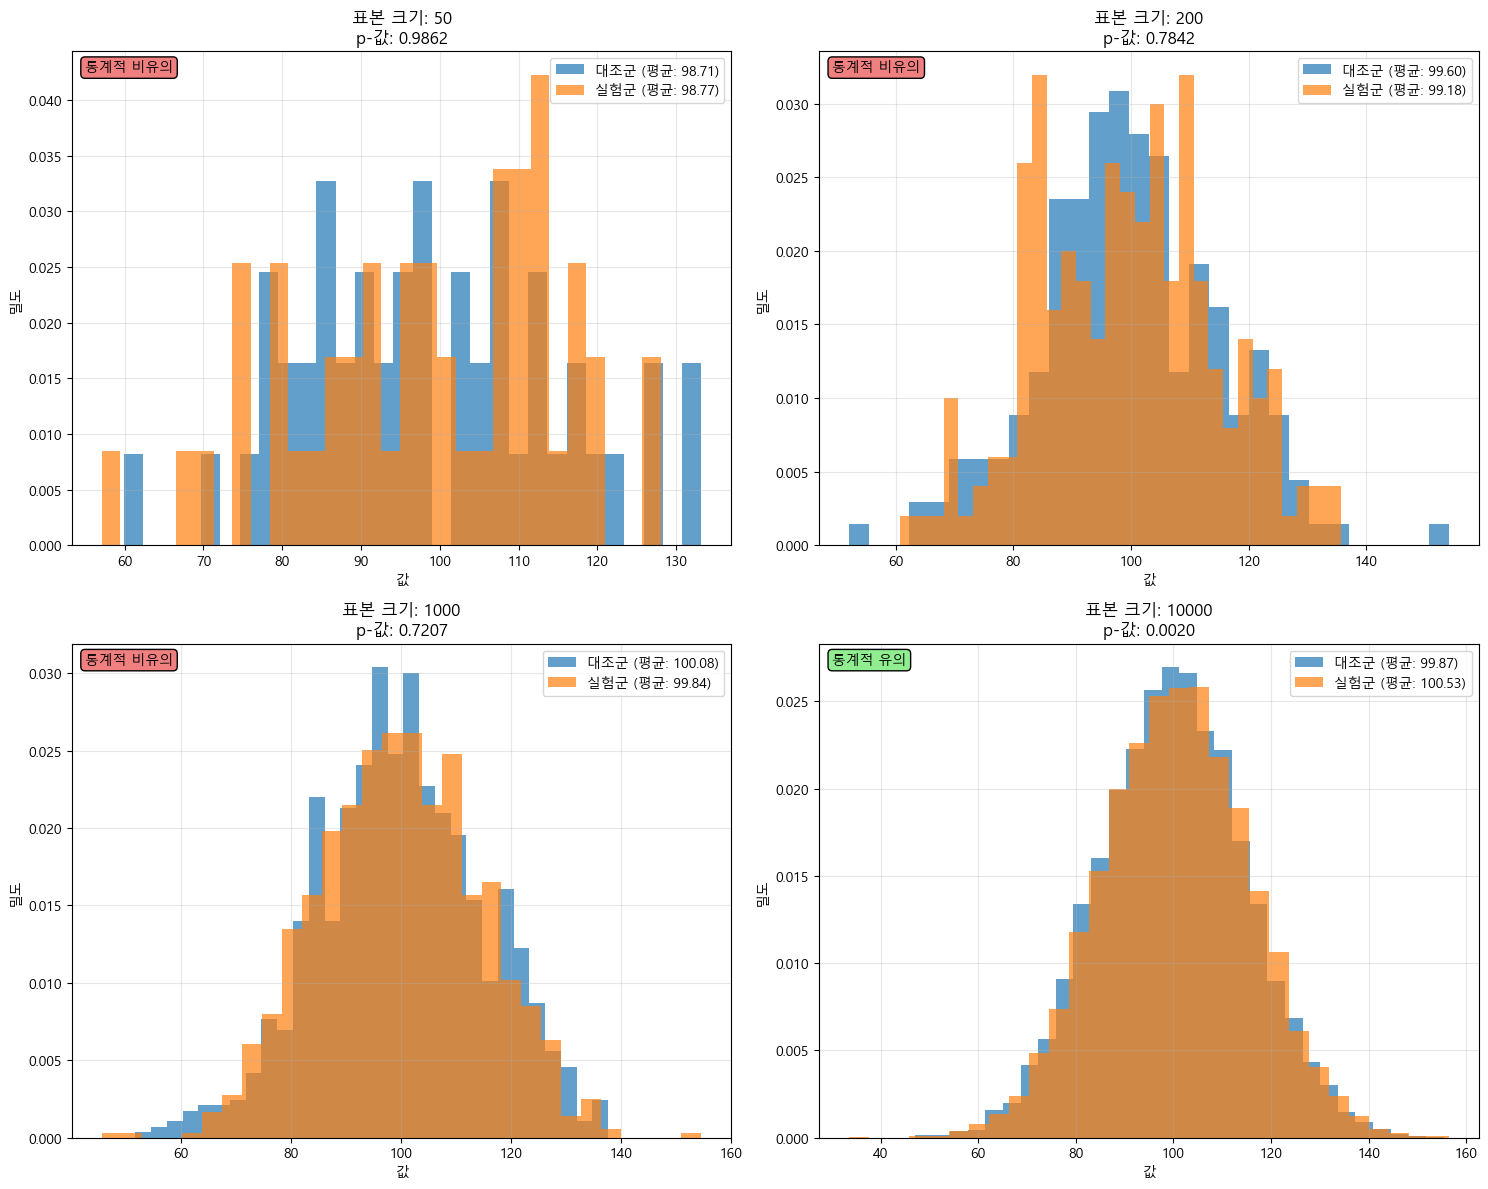

In [8]:
def simulate_ai_pvalue_error():
    """AI가 p-값을 잘못 해석하는 사례"""
    np.random.seed(42)
    
    print("\n=== 사례 2: AI의 p-값 오해석 ===")
    print("상황: 새로운 마케팅 캠페인의 효과 분석")
    print()
    
    # 실제로는 효과가 거의 없는 상황 (매우 작은 효과)
    control_group = np.random.normal(100, 15, 10000)  # 큰 표본
    treatment_group = np.random.normal(100.5, 15, 10000)  # 0.5% 증가 (실무적으로 무의미)
    
    # 통계 검정
    t_stat, p_value = stats.ttest_ind(treatment_group, control_group)
    effect_size = (treatment_group.mean() - control_group.mean()) / np.sqrt((treatment_group.var() + control_group.var()) / 2)
    
    print("【AI의 잘못된 분석】")
    print(f"t-통계량: {t_stat:.3f}")
    print(f"p-값: {p_value:.6f}")
    print(f"대조군 평균: {control_group.mean():.2f}")
    print(f"실험군 평균: {treatment_group.mean():.2f}")
    print()
    print("AI의 해석: 'p < 0.05이므로 캠페인이 효과적입니다. 95% 확률로 캠페인이 성공했습니다!'")
    print("AI의 권장사항: '이 캠페인을 전면 도입하여 매출을 증대시키세요.'")
    print()
    
    print("【올바른 분석】")
    print("문제점 1: p-값을 성공 확률로 오해석")
    print("문제점 2: 효과 크기 무시")
    print("문제점 3: 실무적 의미 고려하지 않음")
    print()
    print(f"올바른 해석:")
    print(f"- 통계적으로 유의하지만 효과 크기가 매우 작음 (Cohen's d = {effect_size:.3f})")
    print(f"- 실제 증가폭: {treatment_group.mean() - control_group.mean():.2f} (0.5%)")
    print(f"- 큰 표본 크기로 인해 작은 차이도 통계적으로 유의하게 나타남")
    print(f"- 캠페인 비용 대비 실제 효과를 고려해야 함")
    
    # 효과 크기별 비교 시각화
    sample_sizes = [50, 200, 1000, 10000]
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.ravel()
    
    for i, n in enumerate(sample_sizes):
        # 동일한 효과 크기로 다른 표본 크기 시뮬레이션
        ctrl = np.random.normal(100, 15, n)
        treat = np.random.normal(100.5, 15, n)
        
        _, p_val = stats.ttest_ind(treat, ctrl)
        
        # 히스토그램
        axes[i].hist(ctrl, bins=30, alpha=0.7, label=f'대조군 (평균: {ctrl.mean():.2f})', density=True)
        axes[i].hist(treat, bins=30, alpha=0.7, label=f'실험군 (평균: {treat.mean():.2f})', density=True)
        axes[i].set_title(f'표본 크기: {n}\np-값: {p_val:.4f}')
        axes[i].set_xlabel('값')
        axes[i].set_ylabel('밀도')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
        
        # 유의성 표시
        if p_val < 0.05:
            axes[i].text(0.02, 0.98, '통계적 유의', transform=axes[i].transAxes, 
                        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"),
                        verticalalignment='top')
        else:
            axes[i].text(0.02, 0.98, '통계적 비유의', transform=axes[i].transAxes, 
                        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"),
                        verticalalignment='top')
    
    plt.tight_layout()
    plt.show()
    
    return p_value, effect_size

p_val_result, effect_size_result = simulate_ai_pvalue_error()



=== AI 분석 결과 검증 체크리스트 ===
【1. 데이터 품질 검증】
  ✓ 표본 크기가 충분한가?
  ✓ 데이터 수집 과정에 편향이 있는가?
  ✓ 결측치나 이상치 처리가 적절한가?
  ✓ 데이터의 대표성이 확보되었는가?

【2. 분석 방법 적절성】
  ✓ 선택한 통계 기법이 데이터 특성에 맞는가?
  ✓ 분석 방법의 가정이 만족되는가?
  ✓ 독립성, 정규성, 등분산성 확인했는가?
  ✓ 다중 비교 보정이 필요한가?

【3. 결과 해석 타당성】
  ✓ 통계적 유의성과 실무적 중요성을 구분했는가?
  ✓ 효과 크기를 함께 보고했는가?
  ✓ 신뢰구간을 제시했는가?
  ✓ 상관관계와 인과관계를 구분했는가?

【4. 맥락적 타당성】
  ✓ 도메인 지식과 일치하는가?
  ✓ 외부 연구 결과와 일관성이 있는가?
  ✓ 결과가 실무적으로 합리적인가?
  ✓ 제한사항과 한계를 명시했는가?

=== 실제 검증 과정 시연 ===
상황: AI가 분석한 '교육 프로그램의 효과' 결과 검증

【AI가 제시한 분석 결과】
t-검정 결과: t = 2.396, p = 0.0195
실험군 평균: 78.86
대조군 평균: 72.41
차이: 6.45점
AI 결론: '교육 프로그램이 효과적입니다 (p < 0.05)!'

【인간 분석가의 검증 과정】
1단계: 데이터 품질 검증
  ✓ 표본 크기: 실험군 30명, 대조군 35명 (불균형)
  ✓ 베이스라인 확인 필요

베이스라인 비교: t = 2.983, p = 0.0041
⚠️ 문제 발견: 베이스라인에 유의한 차이 존재!

2단계: 올바른 분석 방법 (ANCOVA 또는 변화량 비교)
변화량 비교: t = 0.246, p = 0.8068
실험군 변화량: 2.36점
대조군 변화량: 2.06점
효과 크기 (Cohen's d): 0.062

3단계: 올바른 결과 해석
✓ 베이스라인을 고려하면 통계적으로 유의한 차이 없음
✓ AI의 초기 결론은 베이스라인 차이로 인한 오류
✓ 효과 크기가 작음 (0.062 < 0.2)
✓ 표본 크기 부족으로 검정

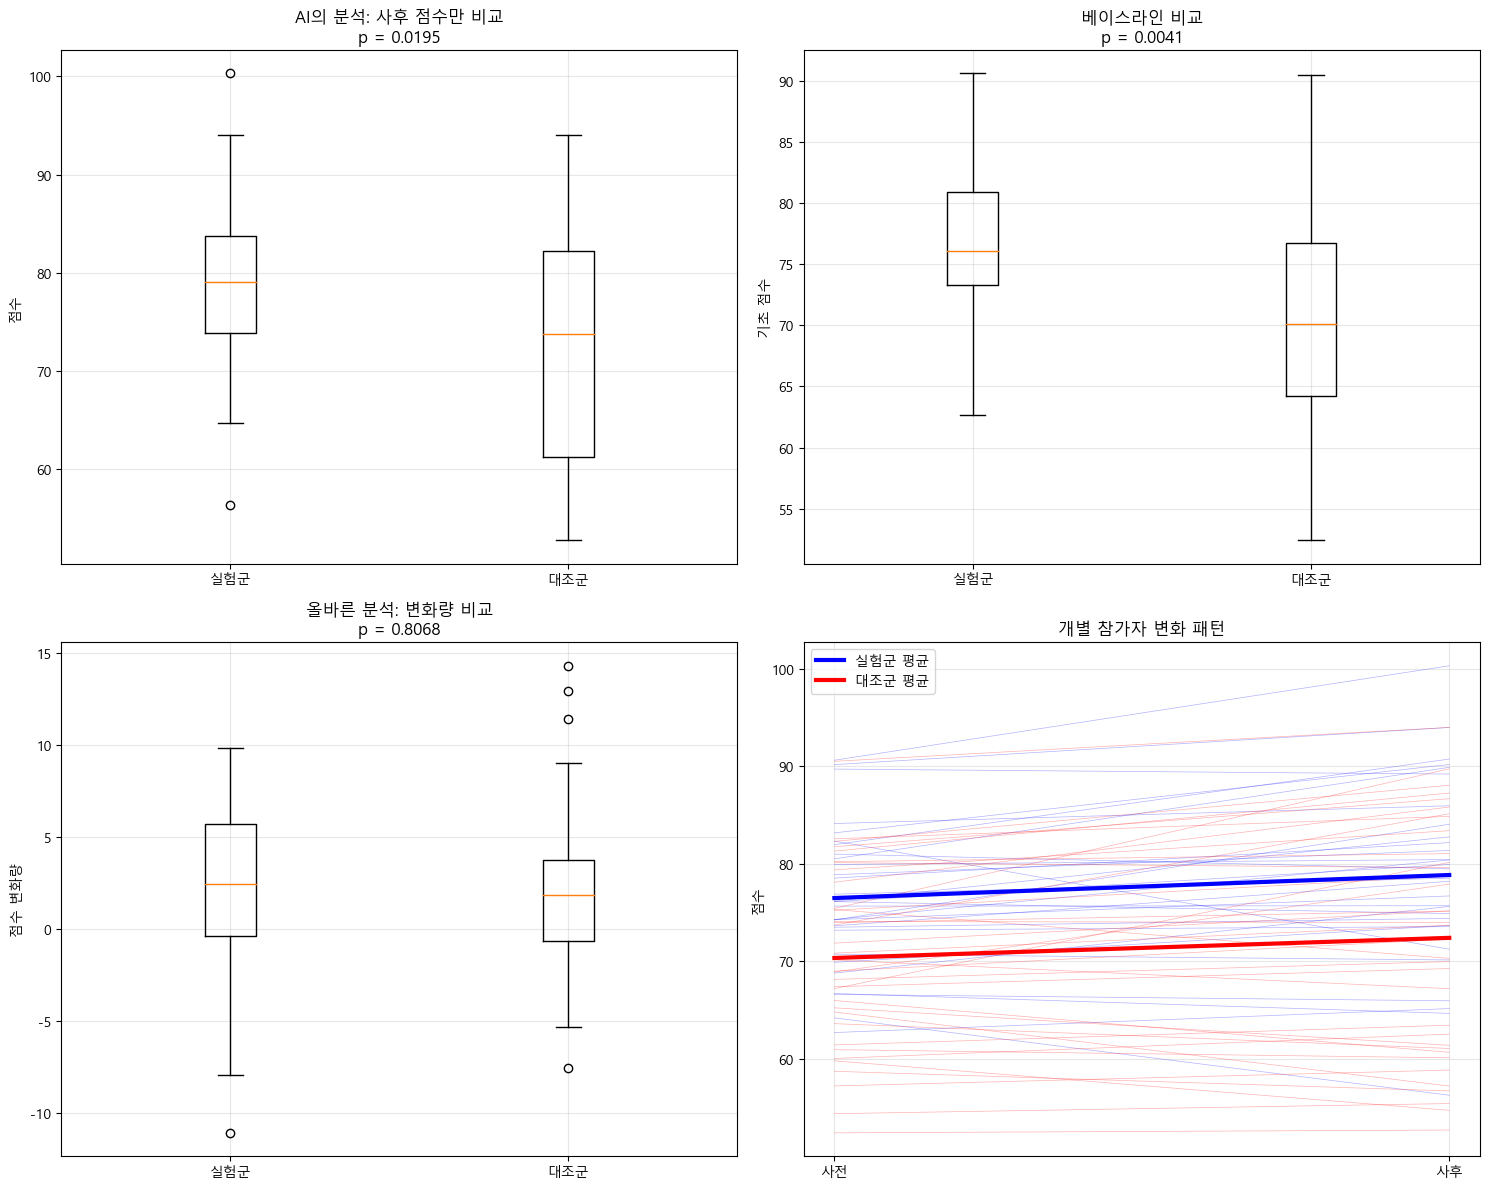

In [9]:
print("\n=== AI 분석 결과 검증 체크리스트 ===")

verification_checklist = {
    "1. 데이터 품질 검증": [
        "표본 크기가 충분한가?",
        "데이터 수집 과정에 편향이 있는가?",
        "결측치나 이상치 처리가 적절한가?",
        "데이터의 대표성이 확보되었는가?"
    ],
    "2. 분석 방법 적절성": [
        "선택한 통계 기법이 데이터 특성에 맞는가?",
        "분석 방법의 가정이 만족되는가?",
        "독립성, 정규성, 등분산성 확인했는가?",
        "다중 비교 보정이 필요한가?"
    ],
    "3. 결과 해석 타당성": [
        "통계적 유의성과 실무적 중요성을 구분했는가?",
        "효과 크기를 함께 보고했는가?",
        "신뢰구간을 제시했는가?",
        "상관관계와 인과관계를 구분했는가?"
    ],
    "4. 맥락적 타당성": [
        "도메인 지식과 일치하는가?",
        "외부 연구 결과와 일관성이 있는가?",
        "결과가 실무적으로 합리적인가?",
        "제한사항과 한계를 명시했는가?"
    ]
}

for category, questions in verification_checklist.items():
    print(f"【{category}】")
    for question in questions:
        print(f"  ✓ {question}")
    print()

#### 실제 검증 과정 시뮬레이션

def demonstrate_verification_process():
    """AI 분석 결과를 체계적으로 검증하는 과정"""
    np.random.seed(42)
    
    print("=== 실제 검증 과정 시연 ===")
    print("상황: AI가 분석한 '교육 프로그램의 효과' 결과 검증")
    print()
    
    # AI가 제시한 분석 결과 (시뮬레이션)
    print("【AI가 제시한 분석 결과】")
    
    # 편향된 데이터 생성 (AI가 놓칠 수 있는 문제점들 포함)
    n_treatment = 30
    n_control = 35
    
    # 문제 1: 표본 크기 차이
    # 문제 2: 베이스라인 차이 (무작위 배정 실패)
    treatment_baseline = np.random.normal(78, 8, n_treatment)  # 더 높은 기초 점수
    control_baseline = np.random.normal(72, 10, n_control)     # 더 낮은 기초 점수
    
    # 문제 3: 실제 효과는 없지만 베이스라인 차이로 인한 허위 효과
    treatment_post = treatment_baseline + np.random.normal(2, 5, n_treatment)  # 약간의 향상
    control_post = control_baseline + np.random.normal(2, 5, n_control)       # 동일한 향상
    
    # AI의 단순 비교
    ai_t_stat, ai_p_value = stats.ttest_ind(treatment_post, control_post)
    
    print(f"t-검정 결과: t = {ai_t_stat:.3f}, p = {ai_p_value:.4f}")
    print(f"실험군 평균: {treatment_post.mean():.2f}")
    print(f"대조군 평균: {control_post.mean():.2f}")
    print(f"차이: {treatment_post.mean() - control_post.mean():.2f}점")
    print("AI 결론: '교육 프로그램이 효과적입니다 (p < 0.05)!'")
    print()
    
    print("【인간 분석가의 검증 과정】")
    
    # 1단계: 데이터 품질 검증
    print("1단계: 데이터 품질 검증")
    print(f"  ✓ 표본 크기: 실험군 {n_treatment}명, 대조군 {n_control}명 (불균형)")
    print(f"  ✓ 베이스라인 확인 필요")
    print()
    
    # 베이스라인 비교
    baseline_t_stat, baseline_p_value = stats.ttest_ind(treatment_baseline, control_baseline)
    print(f"베이스라인 비교: t = {baseline_t_stat:.3f}, p = {baseline_p_value:.4f}")
    print(f"⚠️ 문제 발견: 베이스라인에 유의한 차이 존재!")
    print()
    
    # 2단계: 올바른 분석 방법 적용
    print("2단계: 올바른 분석 방법 (ANCOVA 또는 변화량 비교)")
    
    # 변화량으로 비교
    treatment_change = treatment_post - treatment_baseline
    control_change = control_post - control_baseline
    
    correct_t_stat, correct_p_value = stats.ttest_ind(treatment_change, control_change)
    effect_size = (treatment_change.mean() - control_change.mean()) / \
                  np.sqrt((treatment_change.var() + control_change.var()) / 2)
    
    print(f"변화량 비교: t = {correct_t_stat:.3f}, p = {correct_p_value:.4f}")
    print(f"실험군 변화량: {treatment_change.mean():.2f}점")
    print(f"대조군 변화량: {control_change.mean():.2f}점")
    print(f"효과 크기 (Cohen's d): {effect_size:.3f}")
    print()
    
    # 3단계: 결과 해석
    print("3단계: 올바른 결과 해석")
    if correct_p_value >= 0.05:
        print("✓ 베이스라인을 고려하면 통계적으로 유의한 차이 없음")
        print("✓ AI의 초기 결론은 베이스라인 차이로 인한 오류")
    print(f"✓ 효과 크기가 작음 ({effect_size:.3f} < 0.2)")
    print("✓ 표본 크기 부족으로 검정력 한계")
    print()
    
    print("【최종 올바른 결론】")
    print("현재 데이터로는 교육 프로그램의 효과를 확신할 수 없음")
    print("권장사항:")
    print("1. 더 큰 표본으로 재실험")
    print("2. 무작위 배정 절차 개선")
    print("3. 사전-사후 설계로 변경")
    print("4. 추가 통제변수 고려")
    
    # 시각화
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. AI의 잘못된 비교
    axes[0,0].boxplot([treatment_post, control_post], labels=['실험군', '대조군'])
    axes[0,0].set_title(f'AI의 분석: 사후 점수만 비교\np = {ai_p_value:.4f}')
    axes[0,0].set_ylabel('점수')
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. 베이스라인 차이 확인
    axes[0,1].boxplot([treatment_baseline, control_baseline], labels=['실험군', '대조군'])
    axes[0,1].set_title(f'베이스라인 비교\np = {baseline_p_value:.4f}')
    axes[0,1].set_ylabel('기초 점수')
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. 올바른 분석: 변화량 비교
    axes[1,0].boxplot([treatment_change, control_change], labels=['실험군', '대조군'])
    axes[1,0].set_title(f'올바른 분석: 변화량 비교\np = {correct_p_value:.4f}')
    axes[1,0].set_ylabel('점수 변화량')
    axes[1,0].grid(True, alpha=0.3)
    
    # 4. 개별 변화 패턴
    axes[1,1].plot([1, 2], [treatment_baseline, treatment_post], 'b-', alpha=0.3, linewidth=0.5)
    axes[1,1].plot([1, 2], [control_baseline, control_post], 'r-', alpha=0.3, linewidth=0.5)
    axes[1,1].plot([1, 2], [treatment_baseline.mean(), treatment_post.mean()], 'b-', linewidth=3, label='실험군 평균')
    axes[1,1].plot([1, 2], [control_baseline.mean(), control_post.mean()], 'r-', linewidth=3, label='대조군 평균')
    axes[1,1].set_xticks([1, 2])
    axes[1,1].set_xticklabels(['사전', '사후'])
    axes[1,1].set_ylabel('점수')
    axes[1,1].set_title('개별 참가자 변화 패턴')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'ai_p_value': ai_p_value,
        'correct_p_value': correct_p_value,
        'effect_size': effect_size
    }

verification_results = demonstrate_verification_process()
